<a href="https://colab.research.google.com/github/henilp105/FMML2022-henilp105/blob/main/Lab_18_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Entire Experiment has been executed by Henil Panchal .

FMML 2022 ID: fmml20211022@ihub-data.iiit.ac.in

Many to Many RNNs

These types of networks take a sequence as an input and give a sequence as an output. It can be used in problems like machine translation, named entity recognition, POS tagging and others.

In this project you would work on different types of RNNs on the task of POS tagging. 

In [2]:
import nltk
nltk.download('treebank')
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [3]:
## We will use Treebank from NLTK as dataset
from nltk.corpus import treebank
from nltk.corpus import brown

In [4]:
# load POS tagged corpora from NLTK
treebank_corpus = treebank.tagged_sents(tagset='universal')
brown_corpus = brown.tagged_sents(tagset='universal')
tagged_sentences = treebank_corpus + brown_corpus


In [5]:
print("Number of sentences: " + str(len(tagged_sentences)))
tagged_sentences[0]

Number of sentences: 61254


[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET'),
 ('board', 'NOUN'),
 ('as', 'ADP'),
 ('a', 'DET'),
 ('nonexecutive', 'ADJ'),
 ('director', 'NOUN'),
 ('Nov.', 'NOUN'),
 ('29', 'NUM'),
 ('.', '.')]

This is a many-to-many problem, each data point will be a different sentence of the corpora.

Each data point will have multiple words in the input sequence. This is what we will refer to as X.

Each word will have its correpsonding tag in the output sequence. This what we will refer to as Y.



In [6]:
X = [] # store input sequence
Y = [] # store output sequence

for sentence in tagged_sentences:
    X_sentence = []
    Y_sentence = []
    for entity in sentence:         
        X_sentence.append(entity[0])  # entity[0] contains the word
        Y_sentence.append(entity[1])  # entity[1] contains corresponding tag
        
    X.append(X_sentence)
    Y.append(Y_sentence)


In [7]:
num_words = len(set([word.lower() for sentence in X for word in sentence]))
num_tags   = len(set([word.lower() for sentence in Y for word in sentence]))


In [8]:
print("Total number of tagged sentences: {}".format(len(X)))
print("Vocabulary size: {}".format(num_words))
print("Total number of tags: {}".format(num_tags))

Total number of tagged sentences: 61254
Vocabulary size: 53232
Total number of tags: 12


In [9]:
## Task - 1
## Vectorize each sentence and pad each sequence to a fixed length
print('sample X: ', X[0], '\n')
print('sample Y: ', Y[0], '\n')

sample X:  ['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.'] 

sample Y:  ['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', '.', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NUM', '.'] 



In [10]:

print("1st input sequence length  : {}".format(len(X[0])))
print("1st output sequence length : {}".format(len(Y[0])))

1st input sequence length  : 18
1st output sequence length : 18


In [11]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [12]:
word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(X)                    # fit tokeniser on data
X_encoded = word_tokenizer.texts_to_sequences(X)  # use the tokeniser to encode input sequence                                        # fit tokeniser on data
                                              

In [13]:
## Task - 2 
## Convert Y to categorical and pad it as input
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encoded = tag_tokenizer.texts_to_sequences(Y)


In [14]:
## Padding
#X_encoded is the encoded form X from Task-1
MAX_SEQ_LENGTH = 100  # sequences greater than 100 in length will be truncated

X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post") # Pad for Y
X, Y = X_padded, Y_padded


In [15]:
# Change Y to categorical

In [16]:
Y = to_categorical(Y)

print(Y.shape)

(61254, 100, 13)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [18]:
### Split data in training and testing 
TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=4)


In [19]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))


TRAINING DATA
Shape of input sequences: (52065, 100)
Shape of output sequences: (52065, 100, 13)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (9189, 100)
Shape of output sequences: (9189, 100, 13)


In [20]:
NUM_CLASSES = Y.shape[2]

In [21]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from keras.models import Model

In [22]:
X[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  5594, 21728,     2,  9068,   105,   158,     2,    53,
        1748,     1,   344,    18,     7, 13148,   880,  2681,  4000,
           3], dtype=int32)

In [23]:
### Task - 3 Complete the two lines

In [24]:
rnn_model = Sequential()

# create embedding layer - usually the first layer in text problems
rnn_model.add(Embedding(num_words + 1,         # vocabulary size - number of unique words in data
                        output_dim    =  300,          # length of vector with which each word is represented
                        input_length  =  MAX_SEQ_LENGTH,          # length of input sequence
                        trainable     =  False                    # False - don't update the embeddings
))

# add an any RNN layer which contains 64 RNN cells
rnn_model.add(SimpleRNN(64, return_sequences=True))

# add time distributed (output at each sequence) layer
rnn_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

In [25]:
rnn_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])


In [26]:
rnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          15969900  
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 64)           23360     
                                                                 
 time_distributed (TimeDistr  (None, 100, 13)          845       
 ibuted)                                                         
                                                                 
Total params: 15,994,105
Trainable params: 24,205
Non-trainable params: 15,969,900
_________________________________________________________________


In [27]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=256, epochs=10)


Epoch 1/10
204/204 [==============================] - 22s 88ms/step - loss: 0.6283 - acc: 0.8232
Epoch 2/10
204/204 [==============================] - 18s 89ms/step - loss: 0.4037 - acc: 0.8834
Epoch 3/10
204/204 [==============================] - 19s 95ms/step - loss: 0.3146 - acc: 0.9049
Epoch 4/10
204/204 [==============================] - 18s 88ms/step - loss: 0.2589 - acc: 0.9204
Epoch 5/10
204/204 [==============================] - 18s 89ms/step - loss: 0.2251 - acc: 0.9293
Epoch 6/10
204/204 [==============================] - 18s 90ms/step - loss: 0.2021 - acc: 0.9354
Epoch 7/10
204/204 [==============================] - 18s 90ms/step - loss: 0.1859 - acc: 0.9403
Epoch 8/10
204/204 [==============================] - 18s 88ms/step - loss: 0.1735 - acc: 0.9442
Epoch 9/10
204/204 [==============================] - 18s 87ms/step - loss: 0.1636 - acc: 0.9471
Epoch 10/10
204/204 [==============================] - 18s 88ms/step - loss: 0.1556 - acc: 0.9493


In [28]:
from matplotlib import pyplot as plt

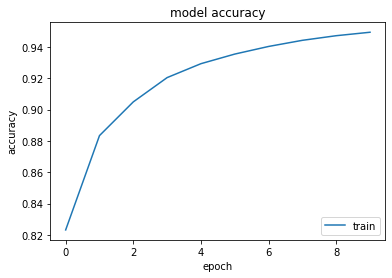

In [29]:
plt.plot(rnn_training.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()


In [30]:
loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

288/288 [==============================] - 3s 9ms/step - loss: 0.1518 - acc: 0.9506
Loss: 0.15180397033691406,
Accuracy: 0.9506388306617737


In [31]:
## Task - 4 How did turning the trainable parameter in Embedding layer into True effect the performance?

Task - 4 How did turning the trainable parameter in Embedding layer into True effect the performance?


answer: the embedding was updated


In [32]:
## Task - 5 How else can you improve the accuracy? 
## ANSWER: the accuracy can be improved by using different models or types of feature extractions

In [33]:
## Task - 6 Use other RNNs present in Keras like LSTM, GRU, BiLSTMs, BiGRU and compare any three models with RNNs 

In [34]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking

lstm_model = Sequential()
lstm_model.add(Embedding(num_words + 1, output_dim    = 200, input_length  = MAX_SEQ_LENGTH,  trainable = True ))           
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))
lstm_model.add(Masking(mask_value=0.0))  ##Masking layer for pre-trained embeddings

lstm_model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 200)          10646600  
                                                                 
 lstm (LSTM)                 (None, 100, 64)           67840     
                                                                 
 time_distributed_1 (TimeDis  (None, 100, 13)          845       
 tributed)                                                       
                                                                 
 masking (Masking)           (None, 100, 13)           0         
                                                                 
Total params: 10,715,285
Trainable params: 10,715,285
Non-trainable params: 0
_________________________________________________________________


In [36]:
lstm_training = lstm_model.fit(X_train, Y_train, batch_size=128, epochs=10)

Epoch 1/10
407/407 [==============================] - 10s 15ms/step - loss: 0.3582 - accuracy: 0.9071
Epoch 2/10
407/407 [==============================] - 6s 14ms/step - loss: 0.0413 - accuracy: 0.9884
Epoch 3/10
407/407 [==============================] - 6s 14ms/step - loss: 0.0247 - accuracy: 0.9916
Epoch 4/10
407/407 [==============================] - 6s 14ms/step - loss: 0.0201 - accuracy: 0.9928
Epoch 5/10
407/407 [==============================] - 6s 14ms/step - loss: 0.0175 - accuracy: 0.9938
Epoch 6/10
407/407 [==============================] - 6s 14ms/step - loss: 0.0156 - accuracy: 0.9944
Epoch 7/10
407/407 [==============================] - 6s 14ms/step - loss: 0.0142 - accuracy: 0.9950
Epoch 8/10
407/407 [==============================] - 6s 14ms/step - loss: 0.0130 - accuracy: 0.9954
Epoch 9/10
407/407 [==============================] - 6s 14ms/step - loss: 0.0119 - accuracy: 0.9958
Epoch 10/10
407/407 [==============================] - 6s 14ms/step - loss: 0.0109 - accur

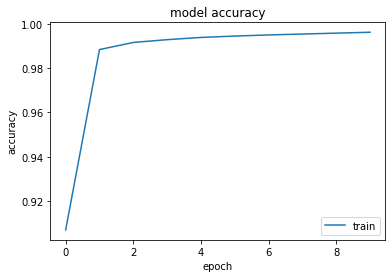

In [37]:
# plotting the values
plt.plot(lstm_training.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()
